# Review 

## Q-learning

Q-learningg is a __model independent__ RL algorithm used to solve MDP problems. 

- __Goal__: 
    
    Learn an optimal strategy through interation with the environment.
- __Method__:

    By updating the `action-value function`   $Q(s,a)$, representing the expected cumulative return that can be obtained by performing ation $a$ in a state $s$.
- __Update formula__:

    $$ Q(s,a) \leftarrow Q(s,a)+\alpha (r+ \gamma \underset{a'}{\max}​Q(s′,a′)−Q(s,a)) $$
    
    - $ [r+ \gamma \underset{a'}{\max}​Q(s′,a′)] $ is the **target value** that Q-learning approximates, representing the expectation of future returns
      - $r$: the immediate reward performing $a$ in $s$.
      - $\underset{a'}{\max}​Q(s′,a′)$: the maximum future return in $s'$.
    <br></br>
    - $[\gamma \underset{a'}{\max}​Q(s′,a′)−Q(s,a)]$ is the **TD error**. It represents the gap between actual returns and current $Q$ value.
    <br></br>
    - $\alpha\;$ is learning rate, controlling the adjustment of $Q$ value. The larger $\alpha$ makes the new information more influential in updating, while the smaller $\alpha$ is more dependent on the existing $Q$ value estimation.


### Features of Q-learning

- __Model independence__:

    *Model* in RL usually refers to a description of the dynamic behavior of the environment, including the transition model and reward function.

    Q-learning only needs the actual result observed from the interaction, i.e., the next state $s'$ and the immediate reward $r$.

- __Offline update__:

    Q-learning does not need to rely on simulations or predictions of future environments. Q values are updated <u>only based on current experience</u>. That is, its knowledge is obtained by estimating the optimal Q value from the sample, rather than by calculating the model.

- __Convergence__:

    Under the appropriate learning rate and exploration strategy, Q-learning can prove that its Q value converges to the optimal Q value.

## SARSA

Similar to Q-learning, SARSA is a sequential difference method, but differently, it is a __on-policy__ method. 

- __Goal__:
    
    Solve for the optimal state-action value function $Q^*(s,a)$, which represents the expected cumulative discount return.

- __Updat formula__:

    $$ Q(s, a) \leftarrow Q(s,a) + \alpha [r + \gamma Q(s', a') - Q(s,a)] $$ 

    <br></br>
    - $[r + \gamma Q(s', a')]\;$  is the __target value__ that SARSA approximates. It represents the expectation of future retrns

      - $r$: the immediate reward performing $a$ in $s$.
      - $Q(s'a')$: future return performing $a'$ in $s'$.
    <br></br>
    - $[\gamma Q(s',a') - Q(s,a)]\;$ is the __TD error__. It represents the gap between actual returns and the current $Q$ value <font color=gray>Q(s,a)</font>.
    <br></br>
    - $\alpha\;$ is learning rate, controlling the adjustment of $Q$ value. The larger $\alpha$ makes the new information more influential in updating, while the smaller $\alpha$ is more dependent on the existing $Q$ value estimation.

### Feature of SARSA

- **On-policy**

    When updating the $Q$ value, it takes into account the outcome of the next action chosen by *current policy*, rather than the action that maximizes the $Q$ value.


# Theoretical Problems

## Q-learning


1. What is the __TD target__ used in the formula for updating Q values in Q-Learning?

    A) $r + \alpha Q(s', a')$

    B) $r + \gamma \max_aQ(s', a)$

    C) $Q(s,a) + r$

    D) $\max_a Q(s, a)$

    <font color=red>B</font>

2. Which of the following conditions will ensure that Q-learning __converges__ to the optimal policy?

    A) The learning rate $\alpha$ is constant.

    B) Explore only a limited number of times.

    C) Each state-action pair is explored indefinitely.

    D) Exploration strategies are not allowed.

    <font color=red>C</font>


## SARSA

1. What are the differences between SARSA and Q-learning?

    __ANSWER__:
    1. Learning type:
        SARSA is an __on-policy__ algorithm that updates the Q value based on actions the agent actually chooses, learning improvements to the current policy.

        Q-learning is an __off-policy__ algorithm that updates the Q value assuming that the agent always takes the optimal actions. Therefore, it tends to find the global optimal solution.

    2. Stypticity:

        SARSA depends on the actions actually taken, so it may converge to a sub-optimal strategy, especially if the environment is complex and the reward structure is unclear.

        Q-learning can _theoritically_ converge to the optimal strategy faster because it assumes that the agent always takes the optimal action, therefore, it can explore the entire state-action space more efficiently.

    3. Application scenarios:

        SARSA is suitable for cases that require a __balance between exploration and exploitation__, especially when the environment changes frequently. It is more conservative, and tends to choose safer solutions in the face of risk.

        Q-learning is more suitable for environment with high certainty or where absolute optimal policies need to be found. Generally, it performs better on tasks that require more efficient learning and strategy optimization.

# Exercise

## Q-learning

Consider a simple Markov Decision Process (MDP) with three states: S1, S2, and G (the goal state). The agent starts at state S1. The possible actions are A1 and A2.

From S1:

- Action A1 leads to S2 with a reward of -1.

- Action A2 leads directly to G with a reward of +10.

From S2:

- Action A1 loops back to S2 with a reward of -1.

- Action A2 leads to G with a reward of +10.

Once the agent reaches the goal state G, the episode ends.

Parameters:

Learning rate (α): 0.5

Discount factor (γ): 0.9

Initial Q-values: 1 for (S2,A1) and 0 for all state-action pairs

Policy: Epsilon-Greedy, with epsilon = 0.4

***Tasks:***

1. Compute the Q-values for each state-action pair using the Q-learning update rule. Perform the updates for two episodes:

    Episode 1: The agent starts at S1, takes action A1 to S2, then takes action A2 to reach G.
    
    Episode 2: The agent starts at S1, takes action A2 directly to G.
    
2. Update the Q-values after each action using the Q-learning formula

## SARSA

Use the same MDP as described above.

Parameters:

Learning rate (α): 0.5

Discount factor (γ): 0.9

Initial Q-values: 1 for (S2,A1) and 0 for all state-action pairs

Policy: epsilon greedy, with epsilon = 0.4

***Tasks***:

1. Compute the Q-values for each state-action pair using the SARSA update rule. Perform the updates for two episodes:

    Episode 1: The agent starts at S1, takes action A1 to S2, then takes action A2 to reach G.

    Episode 2: The agent starts at S1, takes action A2 directly to G.

2. Update the Q-values after each action using the SARSA formula

3. Compare the Q-values obtained from SARSA with those from Q-learning. Explain any differences.

# Simple implementation

![alt text](Q-learning-TD-control.png)

In [1]:
import numpy as np
from collections import defaultdict
import random
import matplotlib.patches as patches

In [2]:
class Q_learning():
    def __init__(self, env, num_eps, gamma=0.99, alpha=0.1):
        """
        Q-Learning (off-policy TD control)
        Params:
            env - environment
            num_eps - number of episodes to run
            gamma - discount factor [0..1]
            alpha - step size (0..1]
            epsilon - epsilon-greedy param
        """
        self.env = env
        self.num_eps = num_eps
        self.gamma = gamma
        self.alpha = alpha
        ## Initialize Q-table for each (s,a) pair
        self.Q = defaultdict(float)
        
            # default zero for all, terminal MUST be zero
            # once add a new pair into keys, a default value(0.) is given
        self.step = 0

    def policy(self, state):
        return None

    def update(self, S, A, R, S_):
        """
        Update Q table with the update formula

        Parameters:
        - S: current state
        - A: the choosen action from the state S
        - R: the immediate reward after taking A on S
        - S_: the next state
        """
        # Current Q value
        current_q = self.Q[S, A]
        # TD target value
        max_Q = np.max([self.Q[S_,a] for a in self.env.action_space(S_)])
        td_target = R + self.gamma * max_Q
        # TD error
        td_error = td_target - current_q
        # Update the Q table
        self.Q[S, A] += self.alpha * td_error

    def run(self):
        """
        Run the agent with given environment
        Return :
        - episode_rewards: the accumulated reward of each episode
        """
        episode_rewards = []

        for _ in range(self.num_eps):   ## Loop for each episode
            S = self.env.reset()        ## Initialize S
            total_reward = 0.
            while True:                 ## Loop for each step
                self.step += 1
                A = self.policy(S)       ## Choose A from S using policy
                
                S_, R, done = self.env.step(A)   ## Take action A, get the next state, immediate reward and flag of convergence
                total_reward += R

                self.update(S, A, R, S_)        ## Update the state
                S = S_
                if done: break

            episode_rewards.append(total_reward)
        return episode_rewards

    def get_policy(self):
        """
        Extract the optiaml policy from the Q table

        Return:
        - policy: a mapping from state to action
        """

        pi = defaultdict()
        for (s, a), v in self.Q.items():
            if (s not in pi.keys()) or (v > pi[s][1]):
                pi[s] = [a, v]

        return pi

![alt text](SARSA.png)

In [3]:
class SARSA:
    def __init__(self, env, num_eps, alpha=0.1, gamma=0.99):
        """
        SARSA Alg.

        Parameters:
        - env: the environment
        - num_eps: the number of episode
        - alpha: learning rate (0 < alpha <= 1)
        - gamma: discount factor (0 <= gamma < 1)
        """
        self.env = env
        self.num_eps = num_eps
        self.alpha = alpha
        self.gamma = gamma
        # Initialize the Q table
        self.Q = defaultdict(float)
    
    def sample(self, state):
            # sample( a from [...]) -> policy, strategy
            return
    
    def update(self, S, A, R, S_, A_):
        """
        Update Q table with the update formula

        Parameters:
        - S: current state
        - A: the choosen action from the state S
        - R: the immediate reward after taking A on S
        - S_: the next state
        - A_: the choosen action from the state S_
        """
        # Current Q value
        current_q = self.Q[S, A]
        # TD target value
        td_target = R + self.gamma * self.Q[S_, A_]
        # TD error
        td_error = td_target - current_q
        # Update the Q table
        self.Q[S, A] += self.alpha * td_error
    
    def run(self):
        """
        Run the agent with given environment
        Return :
        - episode_rewards: the accumulated reward of each episode
        """
        episode_rewards = []
        self.step = 0
        
        for _ in range(self.num_eps):
            S = self.env.reset()
            A = self.policy(S)
            total_reward = 0.
            
            while True:
                # Take action A, get the reward and next state
                self.step += 1
                S_, R, done = self.env.step(A)
                total_reward += R
                # Choose the next action on S_
                A_ = self.policy(S_)
                
                # Update the Q table
                self.update(S, A, R, S_, A_)
                
                # update the state and action
                S = S_
                A = A_
                # if done, finish current episode
                if done:
                    break
            
            episode_rewards.append(total_reward)
            
        return episode_rewards
    
    def get_policy(self):
        """
        Extract the optiaml policy from the Q table

        Return:
        - policy: a mapping from state to action
        """

        pi = defaultdict()
        for (s, a), v in self.Q.items():
            if (s not in pi.keys()) or (v > pi[s][1]):
                pi[s] = [a, v]

        return pi

# Cliff Walking

![alt text](CliffWalking.png)

- __Problem__:

    Consider a grid-world shown as previous picture.

    In a $4 \times 12$ grid, the agent takes the bottom-left corner as the start point and the bottom right corner as the end point. The goal is move the agent from the start point ($(0,0)$) to the end point ($(11,0)$), avoiding reach the cliff ($(i,0)$, for $\forall i \in [1,10]$)

    The agent can move one step each time in the four directions of up, down, left and right.

    Reward is $-1$ on each transition, except those into the cliff region. Stepping into this region incurs a reward of $-100$ and sends the agent back to the start instantly.

## Environment

In [4]:
UP = "up"
LEFT = "left"
DOWN = "down"
RIGHT = "right"

class CliffWalkingEnv:
    def __init__(self):
        self.reset()

    def reset(self):
        """Reset the state as initialization"""
        self._x, self._y = 0, 0        # agent initial position
        return (0, 0)
    
    def action_space(self, given_position=None):
        """Get valid actions according to current state"""
        actions = [UP, LEFT, RIGHT, DOWN]

        if given_position:
            x, y = given_position[0], given_position[1]
        else:
            x, y = self._x, self._y
        if x == 0:
            actions.remove('left')
        elif x == 11:
            actions.remove('right')

        if  y == 0:
            actions.remove('down')
        elif  y == 3:
            actions.remove('up')
        return actions
    
    def reward(self):
        """ After taking action, calculate reward"""
        if self._y == 0 and 1 <= self._x <= 10:
            return -100
        return -1

    def transition(self, action):
        """Perform transition from [x,y] given action. Does not teleport."""
        x, y = self._x, self._y
        if action == LEFT:    x -= 1
        elif action == DOWN:  y -= 1
        elif action == RIGHT:  x += 1
        elif action == UP:  y += 1
        else: raise ValueError('Action must be in [0,1,2,3]')
            
        x = np.clip(x, 0, 11)   # x range is [0..11] incl.
        y = np.clip(y, 0, 3)    # y range is [0..3] incl.
        return x, y

    def step(self, action):
        """
        Give the action, move the agent in the Grid Word.
        Calculate the immediate reward.
            - If reach the cliff region, send it back
            - If reach the end point, stop
        """
        ## State transition
        self._x, self._y = self.transition(action)
        ## Get reward
        reward = self.reward()

        is_end = False
        x_, y_ = self._x, self._y               ## Save the state after action
        if reward == -100:  # CLIFF spanning x=[1..10]
            self._x, self._y = 0, 0             ## Send back to start point
        if self._x == 11 and self._y == 0:      ## Reach the GOAL
            is_end = True                       ## End

        ## Return the next state, immediate reward and end flag (used in Q-learning)
        return (x_, y_), reward, is_end
    
    def get_path(self, Q, maximum_steps=100):
        """
        Returns a path agent would take, if following greedy Q-based policy
        """
        self.reset()
        path = [(self._x, self._y)]   # Save starting position
        for _ in range(maximum_steps):  # Limit steps in case policy is loopy
            A_star = self.action_space()[np.argmax([Q[(self._x, self._y),a] for a in self.action_space()])]   # Choose the best action

            x_, y_ = self.transition(A_star)         ## Step forward
            # (x_, y_), R, flag = self.step(A_star)         ## Step forward
            path.append((x_, y_))         ## Save to path
            if 1 <= x_ <= 10 and y_ == 0: 
                path.append((0,0))
                self._x = 0
                self._y = 0
                
            if x_ == 11 and y_ == 0:  break                # GOAL at (11,0)
            self._x = x_
            self._y = y_

        return path

In [5]:
env = CliffWalkingEnv()

## Plot Utils

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def plot_cliffwalk(Q=None, path_blue=None, path_red=None, labels=None, saveimg=None):
    """Plot windy gridworld.
    
    Will plot optimal action for each cell, according to 'Q'
    and blue/red lines following 'path_blue'/'path_red' parameters
    
    Params:
        Q         - optional, dictionary mappting [(x,y),action] -> float
        path_blue - optional, list [(x1,y1), (x2,y2), ...] of agent steps
        path_red  - optional, list [(x1,y1), (x2,y2), ...] of agent steps
        labels    - tuple of 2x strings, e.g. ('Sarsa', 'Q-Learning')
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.set_xlim(-.5, 11.5)   # cliffwalk x range [0..11]
    ax.set_ylim(-.5, 3.5)    #           y range [0..3]
    ax.set_yticks([])
    ax.set_xticks([])
    ax.axis('off')
    ax.set_aspect('equal', 'datalim')

    # Start, Goal, The Cliff markers
    params = {'horizontalalignment':'center', 'verticalalignment':'center'}
    ax.text(0, 0, 'S', fontsize=18, horizontalalignment='center', verticalalignment='center')
    ax.text(11, 0, 'G', fontsize=18, horizontalalignment='center', verticalalignment='center')
    ax.text(5.5, 0, 'T h e   C l i f f', fontsize=18, **params)
    
    for x in range(12):
        for y in range(4):
            if x not in [0, 11] and y == 0:  # cliff
                ax.add_patch(patches.Rectangle([x-0.5, y-0.5], 1, 1, fill=True, color='lightgray'))    
            else:
                ax.add_patch(patches.Rectangle([x-0.5, y-0.5], 1, 1, fill=False))  # cells

            if Q is not None:
                params = {'head_width':0.2, 'head_length':0.2, 'color':'gray', 'alpha':.2}
                action_space = Q.env.action_space(given_position=[x, y])
                A_star = np.argmax([Q.Q[(x,y),a] for a in action_space])  # pick best action
                A_star = action_space[A_star]
                if A_star == "up":    ax.arrow(x, y, 0,  .1, **params)  # up
                elif A_star == "down":  ax.arrow(x, y, 0, -.1, **params)  # down
                elif A_star == "left":  ax.arrow(x, y, -.1, 0, **params)  # left
                elif A_star == "right":  ax.arrow(x, y,  .1, 0, **params)  # right

    # plot blue line
    if path_blue is not None:
        for i in range(len(path_blue)-1):
            x, y = path_blue[i]
            x_, y_ = path_blue[i+1]
            if labels is not None and i == 0:
                ax.plot([x, x_], [y, y_], color='blue', alpha=1., label=labels[0])
            else:
                ax.plot([x, x_], [y, y_], color='blue', alpha=1.)

    # plot red line
    if path_red is not None:
        for i in range(len(path_red)-1):
            x, y = path_red[i]
            x_, y_ = path_red[i+1]
            if labels is not None and i == 0:
                ax.plot([x, x_], [y, y_], color='red', alpha=1., label=labels[1])
            else:
                ax.plot([x, x_], [y, y_], color='red', alpha=1.)

    fig.legend(loc=4)
                
    plt.tight_layout()
    if saveimg is not None:
        plt.savefig(saveimg)
    plt.show()


## Solution

Here we solve the problem with random policy, i.e., the agent randomly chooses a feasible direction of advance

In [7]:
class Random_Q_learning(Q_learning):
    def policy(self, state):
        action_space = self.env.action_space(state)
        
        return action_space[np.random.choice(len(action_space))]

In [8]:
Q1 = Random_Q_learning(env, num_eps=100, gamma=.7, alpha=.1)
reward = Q1.run()

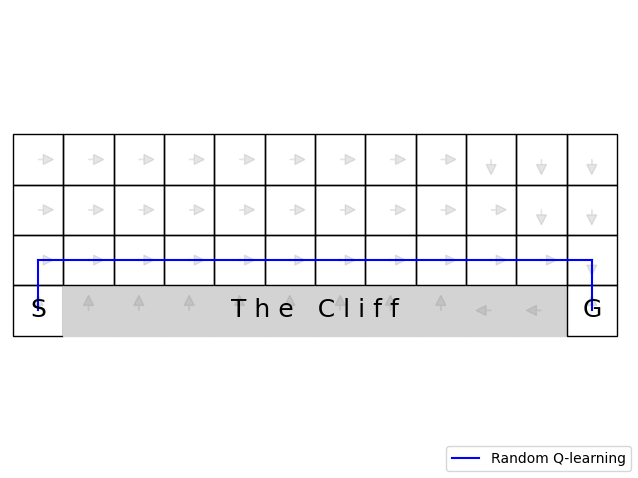

In [9]:
q_path1 = env.get_path(Q1.Q)
plot_cliffwalk(Q1, path_blue=q_path1, labels=["Random Q-learning"])

# Exploration Strategy

In Q-learning, the __Exploration Strategy__ is used to balance _the trade-off between Exploration and Exploitation_.

_Exploration_ helps to discover high-reward actions that may not have been tried before.

_Exploitation_ relies on currently learnt knowledge to perform the optimal behavior.

## $\epsilon$-Greedy

- the most common strategy

- __Principle__: The agent may: (1) randomly select an action <font color=red>(explor)</font> with the probability $\epsilon$, or (2) choose the action with the highest current Q value <font color = red>(exploitation)</font> with the probability $1-\epsilon$.

- __Dynamic regulation $\epsilon$__: Explore more unknown environment in the early stage, exploite learnt knowledge in later stage.

    Use a __diminishing strategy__, i.e., gradually reduce $\epsilon$ over time. E.G.:

    1. $\epsilon_t = \frac{\epsilon_0}{1 + \lambda t}$
    2. $\epsilon_t = \epsilon_0 \cdot e^{-\lambda t}$
    3.  ...

- __Features__:
  - _Advantage_: Simple to implement; Good effect; Suitable for most Q-learning scenarios.
  - _Disadvantage_: In the later stage, even with a very small $\epsilon$, there is still a chance to select the non-optimal or even worst action.

In [10]:
class Greedy_Q_learning(Q_learning):
    def __init__(self, env, num_eps, gamma, alpha, epsilon_start, epsilon_end=None, dynamic=None):
        super().__init__(env, num_eps, gamma, alpha)
        ## Add more parameters about epsilon-greedy
        self.epsilon = epsilon_start
        self.epsilon_end = epsilon_end
        self.dynamic = False
        self.dynamic_fun = dynamic
        if dynamic: self.dynamic = True

    def policy(self, state):
        seed = np.random.rand()
        action_space = self.env.action_space(state) 
        x, y = self.env._x, self.env._y
        if seed < self.epsilon:
            ## Random choice with P=epsilon
            A_star = np.random.choice(len(action_space))
        else:
            ## Choose current optimal one
            A_star = np.argmax(self.Q[(x, y), a] for a in action_space)

        A_star = action_space[A_star]

        ## Update epsilon
        if self.dynamic == True:
            ep = self.dynamic_fun(self.epsilon, self.step)
            if self.epsilon_end:
                self.epsilon = max(self.epsilon_end, ep)
                if self.epsilon <= self.epsilon_end: self.dynamic = False
            # if self.step % 1000 == 0: print(self.epsilon)
        return A_star

In [11]:
def fixed_decay(ep, t, lambda_=0.001):
    new_ep = ep * (1. / (1 + lambda_ * t))
    # print(new_ep)
    return new_ep

In [12]:
Q2 = Greedy_Q_learning(env=env, num_eps=100, gamma=.9 , alpha= 1., epsilon_start=1., epsilon_end=0.7, dynamic=fixed_decay)
reward = Q2.run()

In [13]:
q_path2 = env.get_path(Q2.Q)

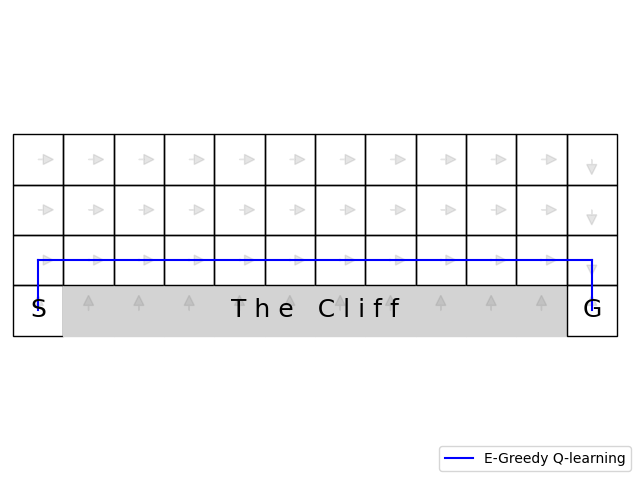

In [14]:
plot_cliffwalk(Q=Q2, path_blue=q_path2, labels=["E-Greedy Q-learning"])

## Softmax Strategy

- a probabilistic choice strategy, and the choice probability of action is related to its Q value

- Actions are selected probabilistically based on Q values.
    - actions with higher Q values are more likely to be selected
    - $P(a|s) = \frac{e^{Q(s,a)/ \tau}}{\sum_{a'}\, e^{Q(s,a')/\tau}}$
  
- Temperature parameter ($\tau$)
  - used to control the randomness of action selection
  - when $\tau$ is large, the selection probabilities of all actions are close $\Rightarrow$ increasing the exploration
  - when $\tau$ is small, the selection probability of higher Q value increases obviously $\Rightarrow$ increasing exploitation

- Features

    - _Advantage_: More intelligent than $\epsilon$-greedy; can explore and use trade-offs according to the difference in Q values.

    - _Disadvantage_: The choice of parameter $\tau$ is more sensitive, and improper setting may lead to slow learning.

In [15]:
class Softmax_Q_learning(Q_learning):
    def __init__(self, env, num_eps, gamma, alpha, tau):
        super().__init__(env, num_eps, gamma, alpha)
        self.tau = tau

    def policy(self, state):
        action_space = self.env.action_space(state)
        S = (self.env._x, self.env._y)
        deno = sum([np.exp(self.Q[S, a]/self.tau) for a in action_space]) + 1e-3
        P = [(np.exp(self.Q[S, a]/self.tau) + 1e-3) / deno for a in action_space]
        A_star = np.argmax(P)
        A_star = action_space[A_star]
        return A_star

In [16]:
Q3 = Softmax_Q_learning(env=env, num_eps=500, gamma=0.7, alpha=.1, tau=0.1)
reward = Q3.run()

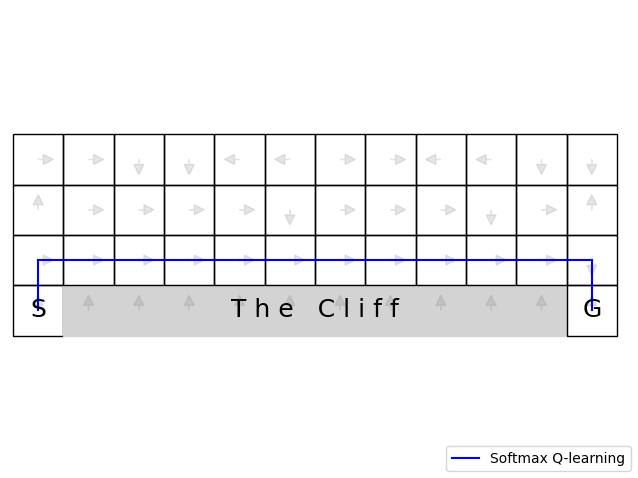

In [17]:
q_path3 = env.get_path(Q3.Q) 
plot_cliffwalk(Q3, path_blue=q_path3,labels=["Softmax Q-learning"])

How about an improper $\tau$?

In [18]:
# Q_ = Softmax_Q_learning(env=env, num_eps=500, gamma=0.7, alpha=1, tau=0.01)
# reward = Q_.run()

## UCB Strategy

Upper Confidence Bound (UCB) is a balanced exploration and exploitation strategy offen used for multi-armed slot machine problems, but can also be applied to Q-learning.
- Idea
    
    When selecting actions with larger current Q values, also consider those less explored (which have wider confidence intervals) for effective exploration.

- Principle
  
    In each state, select the action that maximizes the following formula:
    $$ 
        A_t = \underset{a}{\arg \max} \Bigg( Q(s,a) + c \sqrt{\frac{\ln t}{N(s,a)}} \Bigg)
    $$

    where:

    - $Q(s,a)$ is the current estimated Q value.

    - $N(s,a)$ is the number of times that the state-action pair $(s,a)$ is selected.

    - $t$ is the total number of action selections.

    - $c$ is a parameter that controls the intensity of exploration.

- Features

    - _Advantage_: Balance exploration and utilization more intelligently; automatically adjusting the exploration frequency of each action.
    - _Disadvantage_: The implementation in Q-learning is more complex, only sutiable for the environment with limited number of action choices.


In [19]:
class UBC_Q_learning(Q_learning):
    
    def __init__(self, env, num_eps, gamma, alpha, c):
        super().__init__(env, num_eps, gamma, alpha)
        self.c = c
        self.N = defaultdict(int)

    def policy(self, state):
        action_space = self.env.action_space(state) 
        S = (self.env._x, self.env._y)
        t = np.sum([self.N[S,a] for a in action_space]) + 1e-3
        ln_t = np.log(t)

        A_star = np.argmax([
            self.Q[S,a] + self.c * np.sqrt(np.abs(ln_t / (self.N[S,a] + 1e-3))) for a in action_space
        ])
        A_star = action_space[A_star]
        self.N[S, A_star] += 1
        return A_star

In [20]:
Q4 = UBC_Q_learning(env, num_eps=500, gamma=0.9, alpha=0.1, c=0.1)
reward = Q4.run()

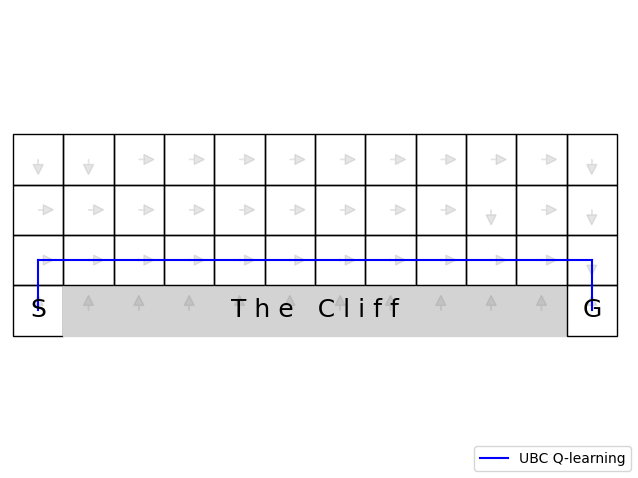

In [21]:
q_path4 = env.get_path(Q4.Q)
plot_cliffwalk(Q4, path_blue=q_path4, labels=['UBC Q-learning'])

# SARSA

Here we implement SARSA with $\epsilon$-Greedy strategy

In [22]:
class E_Greedy_SARSA(SARSA):
    def __init__(self, env, num_eps, alpha=0.1, gamma=0.99, epsilon_start=0.1, epsilon_end=None, dynamic=None):
        """
        - epsilon: the exploration rate in E-Greedy strategy
        """
        super().__init__(env, num_eps, alpha, gamma)
        self.epsilon = epsilon_start
        self.epsilon_end = epsilon_end
        self.dynamic = False
        self.dynamic_fun = dynamic
        if self.dynamic_fun: self.dynamic = True
    
    def policy(self, state):
        """
        choose an action via ε-greedy strategy
        Parameters:
        - state: current state
        Return:
        - action: choosen action
        """
        action_space = self.env.action_space(state)
        if random.uniform(0, 1) < self.epsilon:
            # Explore: Choose a random action
            A_star = random.randint(0, len(action_space)-1)
        else:
            # exploit: choose the maximum action
            Qs = [self.Q[state, a] for a in action_space]
            A_star = np.argmax(Qs)
        A_star = action_space[A_star]
        ## Update epsilon
        if self.dynamic == True:
            ep = self.dynamic_fun(self.epsilon, self.step)
            if self.epsilon_end:
                self.epsilon = max(self.epsilon_end, ep)
                if self.epsilon <= self.epsilon_end: self.dynamic = False
        return A_star

In [23]:
s = E_Greedy_SARSA(env, num_eps=10000, alpha=0.1, gamma=0.9, epsilon_start=1, epsilon_end=0.1, dynamic=fixed_decay)
rewards = s.run()

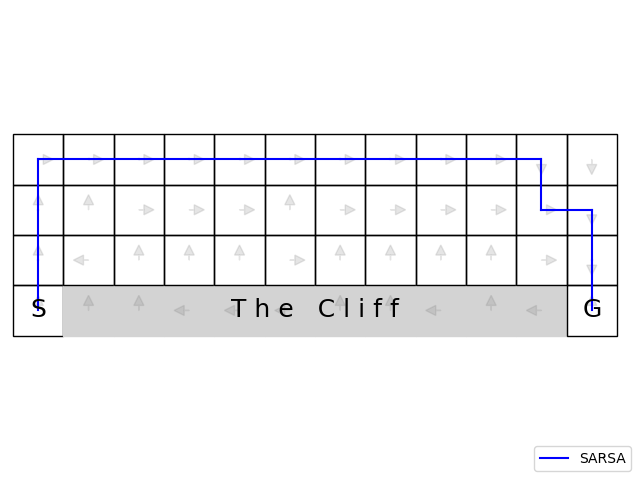

In [24]:
path = env.get_path(s.Q)
plot_cliffwalk(s, path_blue=path, labels=['SARSA'])